# 图像特效-Retinex

In [2]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [3]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [29]:
def singlescale_retinex(img,sigma):
    eps = 1.0e-5
    retinex = np.log10(img+eps) - np.log10(cv2.GaussianBlur(img,(3,3),sigma) + eps)
    retinex *= 255
    retinex = np.clip(retinex,0,255)
    return np.uint8(retinex)

def multiscale_retinex(img,sigma_list):
    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singlescale_retinex(img, sigma)
    retinex = retinex / len(sigma_list)
    retinex = np.clip(retinex,0,255)
    return np.uint8(retinex)

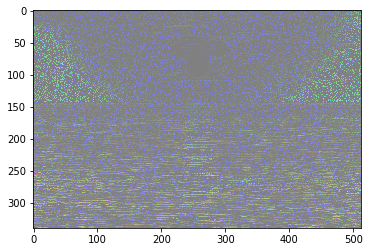

In [30]:
dst = multiscale_retinex(rgb,[2.5,2.5,2.5])
plt.imshow(dst)